In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Генерируем уникальный seed
my_code = "Петров"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

np.random.seed(my_seed)

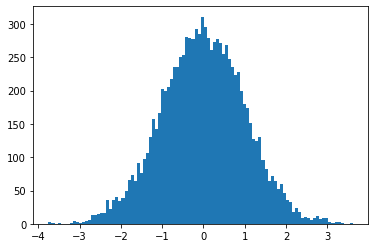

In [3]:
# Формируем случайную нормально распределенную выборку sample
N = 10000
sample = np.random.normal(0, 1, N)

plt.hist(sample, bins=100)
plt.show()

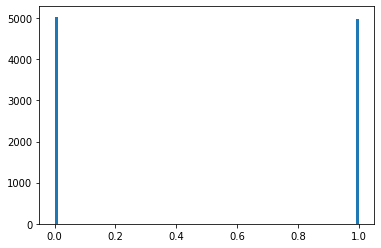

In [4]:
# Формируем массив целевых метока классов: 0 - если значение в sample меньше t и 1 - если больше
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])
plt.hist(target_labels, bins=100)
plt.show()

In [5]:
# Используя данные заготовки (или, при желании, не используя), 
# реализуйте функции для рассчета accuracy, precision, recall и F1

def confusion_matrix(target_labels, model_labels) :
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(target_labels)) :
        if target_labels[i] == 1 and model_labels[i] == 1 :
            tp += 1
        if target_labels[i] == 0 and model_labels[i] == 0 :
            tn += 1
        if target_labels[i] == 0 and model_labels[i] == 1 :
            fp += 1
        if target_labels[i] == 1 and model_labels[i] == 0 :
            fn += 1
    return tp, tn, fp, fn

def metrics_list(target_labels, model_labels):
    metrics_result = []
    metrics_result.append(sk.metrics.accuracy_score(target_labels, model_labels))
    metrics_result.append(sk.metrics.precision_score(target_labels, model_labels))
    metrics_result.append(sk.metrics.recall_score(target_labels, model_labels))
    metrics_result.append(sk.metrics.f1_score(target_labels, model_labels))
    return metrics_result

In [6]:
# Первый эксперимент: t = 0, модель с вероятностью 50% возвращает 0 и 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
metrics_list(target_labels, model_labels)

[0.5034, 0.5001005025125628, 0.5009059794644655, 0.5005029169181251]

In [7]:
# Второй эксперимент: t = 0, модель с вероятностью 25% возвращает 0 и с 75% - 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

labels = np.random.randint(4, size=N)
model_labels = np.array([0 if i == 0 else 1 for i in labels])
np.random.shuffle(model_labels)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
metrics_list(target_labels, model_labels)

[0.5074, 0.5027127166865158, 0.7648479967787397, 0.606675183647397]

In [8]:
# Проанализируйте, какие из метрик применимы в первом и втором экспериментах.

In [9]:
# Третий эксперимент: t = 2, модель с вероятностью 50% возвращает 0 и 1
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
metrics_list(target_labels, model_labels)

[0.504, 0.02174350714717133, 0.5167464114832536, 0.04173106646058732]

In [10]:
# Четвёртый эксперимент: t = 2, модель с вероятностью 100% возвращает 0
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.zeros(N)

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.
metrics_list(target_labels, model_labels)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9791, 0.0, 0.0, 0.0]

In [11]:
# Проанализируйте, какие из метрик применимы в третьем и четвёртом экспериментах.